## Import NumPy

In [1]:
import numpy as np

## Creating a dummy dataset

In [2]:
x_train = np.concatenate([np.random.rand(50, 64), np.random.rand(50, 64)+0.001])
y_train = np.concatenate([np.zeros([50, 1]), np.ones([50, 1])])

## Initialising functions for activation functions, loss function, and evaluation metrics

In [3]:
zero_div = 0.0000000001

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu_differential(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def entropy_loss(y, y_pred):
    n = len(y)
    y_pred_rev = 1.0 - y_pred
    y_rev = 1.0 - y
    y_pred = np.maximum(y_pred, zero_div) # to prevent zero division
    y_pred_rev = np.maximum(y_pred_rev, zero_div) # to prevent zero division
    loss = -1/n * (np.sum(np.multiply(np.log(y_pred), y) + np.multiply((y_rev), np.log(y_pred_rev))))
    return loss

def accuracy(y, y_pred):
    return int(sum(y == y_pred) / len(y) * 100)

## Defining a Neural Network Model from scratch using NumPy

In [4]:
class NumpyNN():
    
    def __init__(self, layers=[64,16,1], num_iter=10, lr=0.01):
        self.params = {}
        self.lr = lr
        self.num_iter = num_iter
        self.loss_per_epoch = []
        np.random.seed(7) # set random seed for reproducibility
        self.params['layer_1'] = np.random.randn(layers[0], layers[1]) 
        self.params['layer_1_b'] = np.random.randn(layers[1])
        self.params['layer_2'] = np.random.randn(layers[1], layers[2])
        self.params['layer_2_b'] = np.random.randn(layers[2])

    def forward(self):

        layer_1_y = self.x.dot(self.params['layer_1']) + self.params['layer_1_b']
        layer_1_act_y = relu(layer_1_y)
        layer_2_y = layer_1_act_y.dot(self.params['layer_2']) + self.params['layer_2_b']
        y_pred = sigmoid(layer_2_y)
        loss = entropy_loss(self.y, y_pred)

        self.params['layer_1_y'] = layer_1_y
        self.params['layer_2_y'] = layer_2_y
        self.params['layer_1_act_y'] = layer_1_act_y

        return y_pred, loss

    def backprop(self, y_pred):

        y_rev = 1 - self.y
        y_pred_rev = 1 - y_pred

        y_pred_grad = np.divide(y_rev, np.maximum(y_pred_rev, zero_div)) - np.divide(self.y, 
                                                                                    np.maximum(y_pred, zero_div))
        layer_2_y_grad = y_pred_grad * (y_pred * y_pred_rev)

        layer_1_act_y_grad = layer_2_y_grad.dot(self.params['layer_2'].T)
        layer_2_grad = self.params['layer_1_act_y'].T.dot(layer_2_y_grad)
        layer_2_b_grad = np.sum(layer_2_y_grad, axis=0, keepdims=True)

        layer_1_y_grad = layer_1_act_y_grad * relu_differential(self.params['layer_1_y'])
        layer_1_grad = self.x.T.dot(layer_1_y_grad)
        layer_1_b_grad = np.sum(layer_1_y_grad, axis=0, keepdims=True)

        self.params['layer_1'] = self.params['layer_1'] - self.lr * layer_1_grad
        self.params['layer_2'] = self.params['layer_2'] - self.lr * layer_2_grad
        self.params['layer_1_b'] = self.params['layer_1_b'] - self.lr * layer_1_b_grad
        self.params['layer_2_b'] = self.params['layer_2_b'] - self.lr * layer_2_b_grad

    def fit(self, x, y):
        self.x = x
        self.y = y

        for i in range(self.num_iter):
            y_pred, loss = self.forward()
            self.backprop(y_pred)
            self.loss_per_epoch.append(loss)
            if i%(self.num_iter/10)==0:
                print(f"Loss at epoch {i} is : {loss}")

    def predict(self, x):
        layer_1_y = x.dot(self.params['layer_1']) + self.params['layer_1_b']
        layer_1_act_y = relu(layer_1_y)
        layer_2_y = layer_1_act_y.dot(self.params['layer_2']) + self.params['layer_2_b']
        y_pred = sigmoid(layer_2_y)
        return np.round(y_pred) 

    def plot_loss(self):
        plt.plot(self.loss_per_epoch)
        plt.title("Training curve")
        plt.xlabel("iters")
        plt.ylabel("cross-entropy loss")
        plt.show()  

## Training the Neural Network Model

In [8]:
nn = NumpyNN(lr=0.001, num_iter=1000)
nn.fit(x_train, y_train)

Loss at epoch 0 is : 3.334893474288788
Loss at epoch 100 is : 0.7373995925964704
Loss at epoch 200 is : 0.5931338129388729
Loss at epoch 300 is : 0.541321002806226
Loss at epoch 400 is : 0.4907569297164152
Loss at epoch 500 is : 0.44177746167525
Loss at epoch 600 is : 0.39537489272683124
Loss at epoch 700 is : 0.351629365704974
Loss at epoch 800 is : 0.30949575284318537
Loss at epoch 900 is : 0.2696576968583629


## Examining the training curve

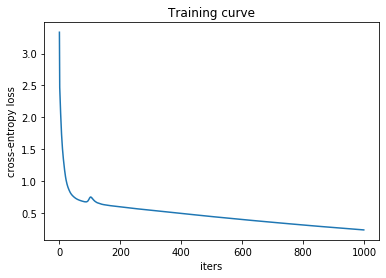

In [9]:
import matplotlib.pyplot as plt
nn.plot_loss()

## Evaluating the model performance

In [10]:
train_pred = nn.predict(x_train)
print("Accuracy on train set is {}%".format(accuracy(y_train, train_pred)))

Accuracy on train set is 94%
